In [4]:
%matplotlib inline
import numpy as np
import random as rd
import math
import matplotlib.pyplot as plt
import statistics as stat

In [5]:
def kmeans(points, k,prec=0.0001,m=1):
    l=len(points)
    if k > l:
        print ('The partitioning is impossible')
    else:
        centroids = np.empty([k,2])
        for j in range(0, k):
            centroids[j,:]=points[j,:]
        while (m > prec):
            new_centroids=np.empty([k,2])
            list_index=[]
            for i in range(0,l):
                list_dist=[]
                for j in range(0,k):
                    dist=np.linalg.norm(points[i,:] - centroids[j,:])
                    list_dist.append(dist)
                min_index=np.argmin(list_dist)
                list_index.append(min_index)
            for j in range(0,k):
                indeces=np.where(np.asarray(list_index)==j)[0]
                if len(indeces) > 0:
                    new_centroids[j,:]=sum(points[indeces])/(len(indeces))
                else:
                    rand_int=rd.randint(0,l-1)
                    new_centroids[j,:]=points[rand_int,:]
            m=np.linalg.norm(centroids - new_centroids)
            centroids=new_centroids
            
        list_diameter=[]   
        for j in range(0,k):
            indeces=np.where(np.asarray(list_index)==j)[0]
            diameter=math.sqrt(sum(np.linalg.norm(points[indeces]- centroids[j,:],axis=1)**2)/len(indeces))
            list_diameter.append(diameter)
        Matrix_DB= np.zeros([k,k])
        for i in range(0,k):
            for j in range(0,i-1):
                Matrix_DB[i,j]=(list_diameter[i]+list_diameter[j])/(np.linalg.norm(centroids[i,:]-centroids[j,:]))
            for j in range(i+1,k):
                Matrix_DB[i,j]=(list_diameter[i]+list_diameter[j])/(np.linalg.norm(centroids[i,:]-centroids[j,:])) 
            
        DB=sum(np.amax(Matrix_DB, axis=1))/k
    
    
    return centroids, list_index, m, DB

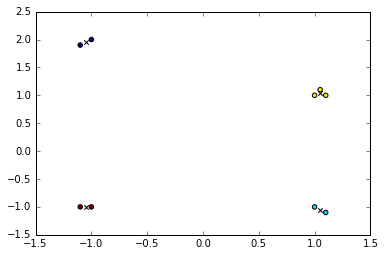

In [8]:
points=np.array([[1.,1.],[1.1,1.],[1.05,1.1],[-1.,-1.],[-1.1,-1.],[-1.,2.],[-1.1,1.9],[1.,-1.],[1.1,-1.1]])
centro, listo,mo,DBo=kmeans(points,4)
plt.scatter(points[:,0], points[:,1], c=listo)
plt.scatter(centro[:,0], centro[:,1],marker='x',color='black')

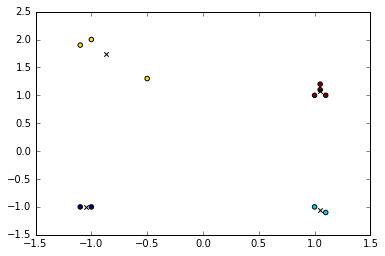

In [9]:
points=np.array([[1.,1.],[1.1,1.],[-0.5,1.3],[1.05,1.1],[-1.,-1.],[-1.1,-1.],[-1.,2.],[-1.1,1.9],[1.05,1.2], [1.,-1.],[1.1,-1.1]])
centro, listo,mo,DBo=kmeans(points,4)
plt.scatter(points[:,0], points[:,1], c=listo)
plt.scatter(centro[:,0], centro[:,1],marker='x',color='black')

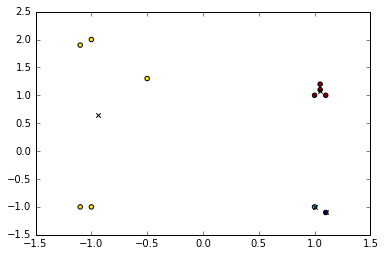

In [10]:
points=np.array([[1.,1.],[1.1,1.],[-0.5,1.3],[1.05,1.1],[-1.,-1.],[-1.1,-1.],[-1.,2.],[-1.1,1.9],[1.05,1.2], [1.,-1.],[1.1,-1.1]])
centro, listo,mo,DBo=kmeans(points,4)
plt.scatter(points[:,0], points[:,1], c=listo)
plt.scatter(centro[:,0], centro[:,1],marker='x',color='black')

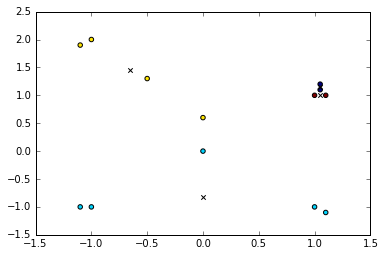

In [11]:
points=np.array([[1.,1.],[0,0],[0,0.6],[1.1,1.],[-0.5,1.3],[1.05,1.1],[-1.,-1.],[-1.1,-1.],[-1.,2.],[-1.1,1.9],[1.05,1.2], [1.,-1.],[1.1,-1.1]])
centro, listo,mo,DBo=kmeans(points,4)
plt.scatter(points[:,0], points[:,1], c=listo)
plt.scatter(centro[:,0], centro[:,1],marker='x',color='black')




